# Australian news topics and twitter analytics
### Question 

What were the top Australian news topics over the last decade, and what
can these say about the national conversation?

# 1. Question and business concern

**Questions interpretation**

*1. What were the top Australian news topics over the last decade.*
- Over the last 10 years, what were the most reported or mentioned news topics in Australian news.

*2. What can the Australian news topics say about the national conversation.*
- How can the top news topics reflect the national interests during the same period.

**What are the points of business concern in the questions:**
- The top news topic may demonstrate the most frequency happened issue on those specific period through the news agency. For this reason, the point that makes the analysis questions be significant is how the top news impacts the national voices at that moment. Key stakeholders may be the person who are interested in communities' develpoment from the cases that mostly happened over the last decade, the nation's interests, how the nation interact with the current situation and the influence of the news topics to the nation's opinion.

**Key stakeholders**
1. Government
2. Reporters
3. Economists
4. News editors
5. Politicians

# 2. Data

In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [20]:
# import library
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt 

# Text Analysis libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

#natural Language Proccessing libraries
import re
import os
from collections import Counter
%matplotlib inline
from wordcloud import WordCloud

### [2.1] Load data

The first dataset was retreived from ABC NEWS Australia from <a href="https://www.kaggle.com/therohk/million-headlines">Kaggle</a> for analysing the question number one.

In [37]:
# Load data
filename = "abcnews-date-text_Fareeda_10548734.csv"
dataset = pd.read_csv(filename, parse_dates=[0], infer_datetime_format=True)
dataset

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers
...,...,...
1186013,2019-12-31,vision of flames approaching corryong in victoria
1186014,2019-12-31,wa police and government backflip on drug amne...
1186015,2019-12-31,we have fears for their safety: victorian premier
1186016,2019-12-31,when do the 20s start


In [22]:
dataset.shape

(1186018, 2)

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186018 entries, 0 to 1186017
Data columns (total 2 columns):
publish_date     1186018 non-null datetime64[ns]
headline_text    1186018 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 18.1+ MB


The second dataset was retreived from Australian Election 2019 Tweets from <a href="https://www.kaggle.com/taniaj/australian-election-2019-tweets/kernels">Kaggle</a> for the question number two.

In [38]:
# import twitter trend dataset in 2019
filename = "auspol2019_Fareeda_10548734.csv"
aus_elec2019 = pd.read_csv(filename)
aus_elec2019

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
0,2019-05-20 09:13:44,1130401208756187136,After the climate election: shellshocked green...,0.0,0.0,9.248486e+07,PIPELINEPETE,jocksjig,Retired Tradesman and Progressive Anti Conserv...,"Brisbane, Queensland",2009-11-25 09:19:45
1,2019-05-20 09:13:43,1130401205367140357,@narendramodi @smritiirani Coverage of indian ...,0.0,0.0,7.756474e+08,Narinder Parmar,nparmar1957,"Life coach & trainer, Motivational speaker, Ma...","Wollongong, NSW, AUSTRALIA",2012-08-23 10:20:40
2,2019-05-20 09:13:33,1130401162782371841,@workmanalice Do you know if Facebook is relea...,0.0,0.0,5.687300e+04,Peter Wells,peterwells,Writes for @theage and @smh on technology and ...,Melbourne,2006-12-11 07:38:06
3,2019-05-20 09:13:29,1130401143551434753,@vanbadham We all understand we have a compuls...,0.0,0.0,9.081660e+17,The Realist,therealist822,"Calls it as I see it. Anti PC, SJW and VS. If ...",NaN,2017-09-14 03:10:30
4,2019-05-20 09:13:23,1130401118666809345,"Shares were mixed in Asia, with India and Aust...",0.0,0.0,5.260074e+08,Inquirer Business,InquirerBiz,The official Twitter account of the Inquirer G...,Philippines,2012-03-16 03:51:59
...,...,...,...,...,...,...,...,...,...,...,...
183374,2019-05-11 03:19:57,1127050685621493760,#australiavotes; The BANKS are taking your mon...,0.0,0.0,1.010011e+18,ivanparty.org,IvanpartyO,The IVAN PARTY is a new political party with a...,NaN,2018-06-22 04:07:26
183375,2019-05-11 02:50:09,1127043187292295169,Vote casted.... So no democracy sausage for ea...,0.0,0.0,7.853301e+07,Ralph Michael,OrangeRafi,Filipino living in Australia|IT Pro|Traveler|o...,"Melbourne, Australia",2009-09-30 06:35:22
183376,2019-05-11 02:31:09,1127038404066045952,SINCERITY IS A #WINNING #SALES CHARACTERISTIC-...,0.0,0.0,1.009595e+18,LuceGluyas@gmail.com,GluyasLuce,NaN,NaN,2018-06-21 00:32:35
183377,2019-05-11 00:01:33,1127000757717303296,These arrived. No sign of a democracy sausage ...,0.0,0.0,3.226870e+09,Sarah Hamlyn,in_deep_oceans,"Nature lover, terrible photographer, marine sc...","Key West, FL",2015-05-26 08:16:56


In [25]:
aus_elec2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183379 entries, 0 to 183378
Data columns (total 11 columns):
created_at          183379 non-null object
id                  183379 non-null object
full_text           183379 non-null object
retweet_count       183370 non-null float64
favorite_count      183370 non-null float64
user_id             183370 non-null float64
user_name           183358 non-null object
user_screen_name    183370 non-null object
user_description    167659 non-null object
user_location       146485 non-null object
user_created_at     183361 non-null object
dtypes: float64(3), object(8)
memory usage: 15.4+ MB


**Preprocess data**
- There is no missing values for interesting variables.
- Most data types is text and datetime.

# 3. Analysis and Visualisation

### [3.1] What were the top Australian news topics over the last decade.

**Analysis method**

In order to find the top topics, the appropriate method should be exploring the frequency of meaningful words. First we need to select the analysis period, the last decade information which is the last 10 years period(2010 - 2019) is required. 

In [26]:
# select Year 2010-2019 for analysis by filtering with regex
dataset1 = dataset.set_index('publish_date')
dataset_decade = dataset1.filter(regex = '201[0-9]{1}\-[0-9]{2}\-[0-9]{2}', axis = 0 )
dataset_decade

,headline_text
publish_date,
2010-01-01,12m degas stolen from museum
2010-01-01,17 die in bangladesh bus crash
2010-01-01,2010 to be drier after very wet 2009
2010-01-01,37 catholic workers killed worldwide
2010-01-01,600 hurt in philippine new year revelry
...,...
2019-12-31,vision of flames approaching corryong in victoria
2019-12-31,wa police and government backflip on drug amne...
2019-12-31,we have fears for their safety: victorian premier


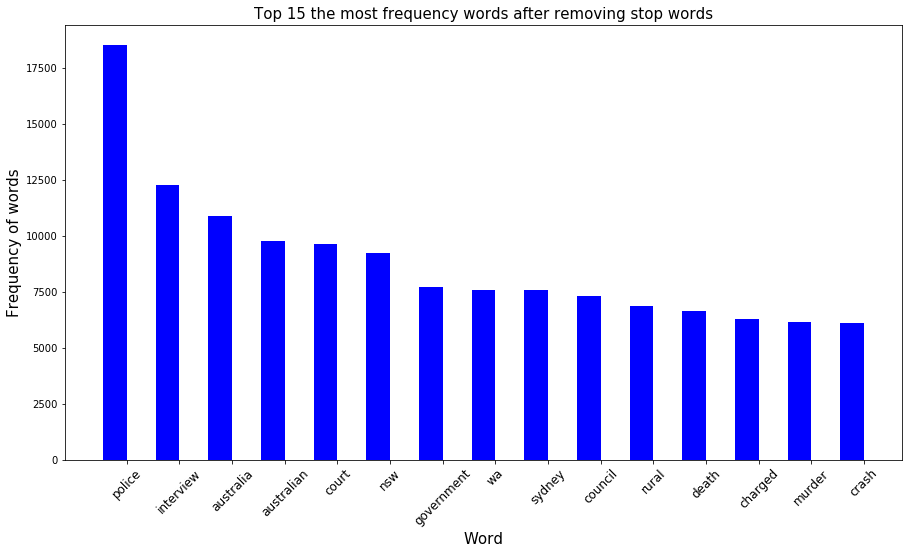

In [27]:
# Find frequency of each mentioned words in topic's NEWS
cnt = Counter()
data_new = dataset_decade
for x in data_new["headline_text"]:
    items = x.split(" ")
    for y in items:
        cnt[y]+=1
ind = np.arange(15) 
width = 0.45       

# Top 15 the most frequency words after removing stop words
# list of stop words
unwanted = ("new","man","says", "day", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the");
for k in unwanted:
    del cnt[k]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
first15keys2 = [k for k in sorted(cnt,key = cnt.get,reverse = True)[:15]]
first15vals2 = [k for k in sorted(cnt.values(),reverse = True)[:15]]
rects2 = ax.bar(ind, first15vals2, width,
                color='blue')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(first15keys2, fontsize =12, rotation=45)
ax.set_xlabel("Word", fontsize =15)
ax.set_ylabel("Frequency of words", fontsize =15)
ax.set_title("Top 15 the most frequency words after removing stop words", fontsize =15)
plt.show()


**[3.1.1] Analysis Part 1**

As the result, we can see that the most frequency of the words that have been mentioned. It may roughly categorise them as follow:
- **Group 1 Politics and society** "police", "court", "government", "council", "death", "rural", "charged", "murder", "crash"
- **Group 2 City and country name** "Australia", "Australian", "NSW", "WA", "sydney"
- **Group 3 Others** "interview"

From the bar graph above shows that "police" is the most mentioned word on news topics. Next step, using Regex match the headline news that has "police" word in the sentence. 

In [28]:
# see all the list of NEWS topic
dataset_list = dataset_decade['headline_text'].tolist()
dataset_str = ', '.join(map(str, dataset_list))
dataset_list

['12m degas stolen from museum',
 '17 die in bangladesh bus crash',
 '2010 to be drier after very wet 2009',
 '37 catholic workers killed worldwide',
 '600 hurt in philippine new year revelry',
 'abbott vows to turn back asylum seekers',
 'accused refused bail over deakin break in',
 'agforce opposes great barrier reef run off',
 'airport security stripped bare',
 'alcohol related injuries flood qld emergency wards',
 'all eyes on belgian comeback queens',
 'anger as centrelink fast tracks repayments',
 'another asylum seeker boat intercepted',
 'arsenal re signs young gun diaby',
 'art exhibit set to boost local economy',
 'australia brings in 2010 with a bang',
 'australias coal addiction set in train 30 years ago',
 'birt naved save panicking tigers',
 'blanchett extends stay at theatre company',
 'blaze leads nbl into 2010',
 'body found inside incinerated car',
 'body of diver found off wa',
 'bomb suspect began journey in ghana',
 'boosted police presence after family feud',
 'bo

In [29]:
# see all the list that contained "police" 
mylist = dataset_list
r = re.compile(".*police.*")
newlist = list(filter(r.match, mylist)) 
newlist

['boosted police presence after family feud',
 'escaped convict taunts police on facebook',
 'fireworks aimed at police',
 'man shot in self defence say police',
 'most new years eve revellers well behaved police',
 'national rules needed after fatal police chase',
 'police chief backs officers after toddlers death',
 'police hunt for parents of teen struck by car',
 'policeman among hundreds arrested during new years',
 'policeman hospitalised after nightclub bashing',
 'police target falls festival drivers',
 'road toll still too high say police',
 'toddler killed in police chase',
 'windies star charged over police assault',
 'police call for mobile speed cameras',
 'police divers join search for missing teen',
 'police investigate fatal car smash',
 'policeman dies after nye attack',
 'police officers bitten during arrest',
 'police shoot man trying to enter mohammed',
 'call for witnesses to slain policemans attack',
 'police hunt 5 over armed robbery',
 'police set upon by 60 str

In [30]:
# Find frequency of each mentioned words in police topic's NEWS
cnt = Counter()
data_new = newlist
for x in data_new:
    items = x.split(" ")
    for y in items:
        cnt[y]+=1
ind = np.arange(15) 
width = 0.45       

# Top 15 the most frequency words after removing stop words
# list of stop words
unwanted = ("new","man","says","say", "day", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the");
for k in unwanted:
    del cnt[k]
    
keys = [k for k in sorted(cnt,key = cnt.get,reverse = True)[:]]
vals = [k for k in sorted(cnt.values(),reverse = True)[:]]

d = {'words': keys, 'words_frequency': vals}
police_topic = pd.DataFrame(data = d) 
police_topic.index = np.arange(1, len(police_topic)+1)
police_topic

,words,words_frequency
1,police,18498
2,officer,845
3,investigate,772
4,probe,751
5,search,731
...,...,...
12251,90k,1
12252,foccused,1
12253,dansies,1
12254,chelsea,1


**[3.1.2] Analysis Part 2**

It can be seen that, the top headline news over the past 10 years might be about **the police investigation** after considering the top five mentioned words. This may reflect that criminal cases had often happened for the last decade. 

The big picture of the frequency words in headline news will be showed below.

Text(0.5, 1.0, 'Vocabulary from Reviews')

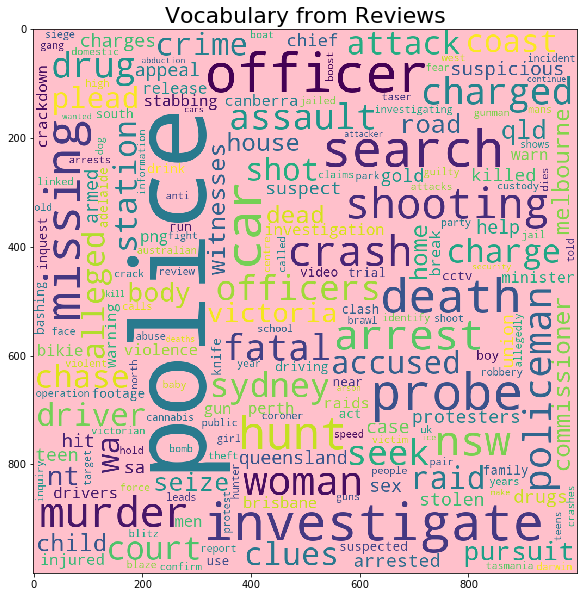

In [31]:
#some general word frequencies
text = cnt
wordcloud = WordCloud(background_color = 'pink', width = 1000, height = 1000).generate_from_frequencies(dict(text))
                                                                                                       
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 22)

### [3.2] What can the Australian news topics say about the national conversation.

What is the possible definition of the national conversation?
- The massive issues that are widely discussed in board area by citizens.
- Social media trend such as google top search, twitter trend and facebook migth be represented the national conversation.
- It may include romour, fake news, personal opinion and so on.

### Pick up a small sample size for more deeper analysis

Firstly, investigating headline news and twitter trend representing as a general national conversation. To do that, selecting before and after Australia's election period between 10 May 2019 and 20 May 2019 as the analysis time. Therefore, the shorter term period espeacially in important event might indicate the relationship between headline news and national conversation more obvious than random news from the long-term period.  

In [32]:
# filter 2019 headline news
dataset_2019 = dataset1.filter(regex = '2019\-05\-[1-2]{1}0', axis = 0 )
dataset_2019

,headline_text
publish_date,
2019-05-10,ace bartletts family says seeing him wave is
2019-05-10,advocates applaud nsw government decision our ...
2019-05-10,afl the footy show axed by channel nine
2019-05-10,amazon ceo unveils lunar lander concept vehicle
2019-05-10,amber alert issued for missing baby
...,...
2019-05-20,what happened to the climate change vote
2019-05-20,what the senate might look like after this ele...
2019-05-20,where the major parties might gain and lose seats


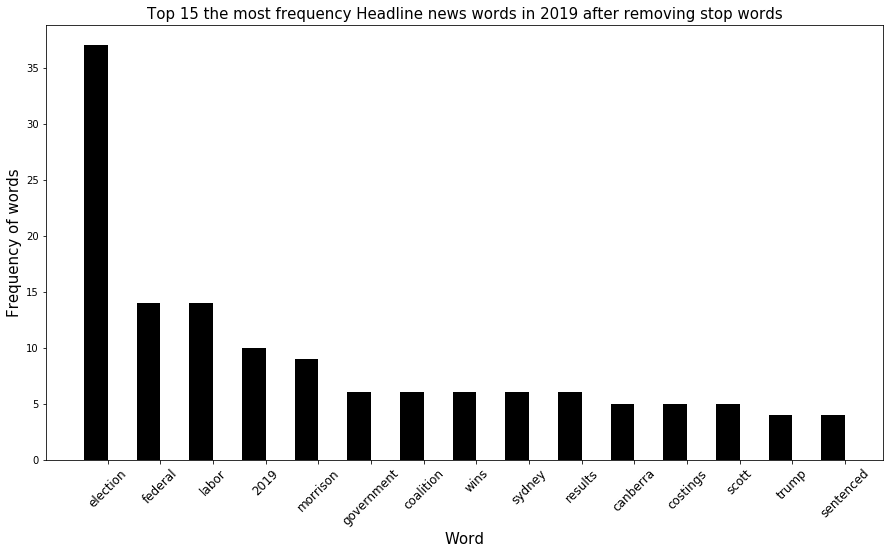

In [33]:
# Find frequency of each mentioned words on topic's NEWS 
cnt = Counter()
data_new = dataset_2019
for x in data_new["headline_text"]:
    items = x.split(" ")
    for y in items:
        cnt[y]+=1
ind = np.arange(15) 
width = 0.45       

# Top 15 the most frequency words after removing stop words
# list of stop words
unwanted = ("says","day","man", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the");
for k in unwanted:
    del cnt[k]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
first15keys2 = [k for k in sorted(cnt,key = cnt.get,reverse = True)[:15]]
first15vals2 = [k for k in sorted(cnt.values(),reverse = True)[:15]]
rects2 = ax.bar(ind, first15vals2, width,
                color='black')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(first15keys2, fontsize =12, rotation=45)
ax.set_xlabel("Word", fontsize =15)
ax.set_ylabel("Frequency of words", fontsize =15)
ax.set_title("Top 15 the most frequency Headline news words in 2019 after removing stop words", fontsize =15)
plt.show()


Text(0.5, 1.0, 'Headline news - Vocabulary Reviews')

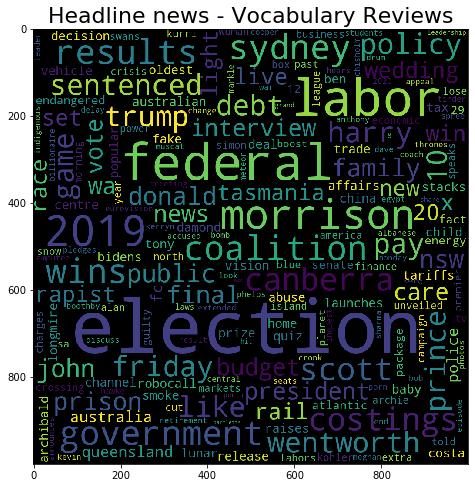

In [34]:
# see the big picture of the frequency mentioned words in headline news
text = cnt
wordcloud = WordCloud(background_color = 'black', width = 1000, height = 1000).generate_from_frequencies(dict(text))
                                                                                                       
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("Headline news - Vocabulary Reviews", fontsize = 22)

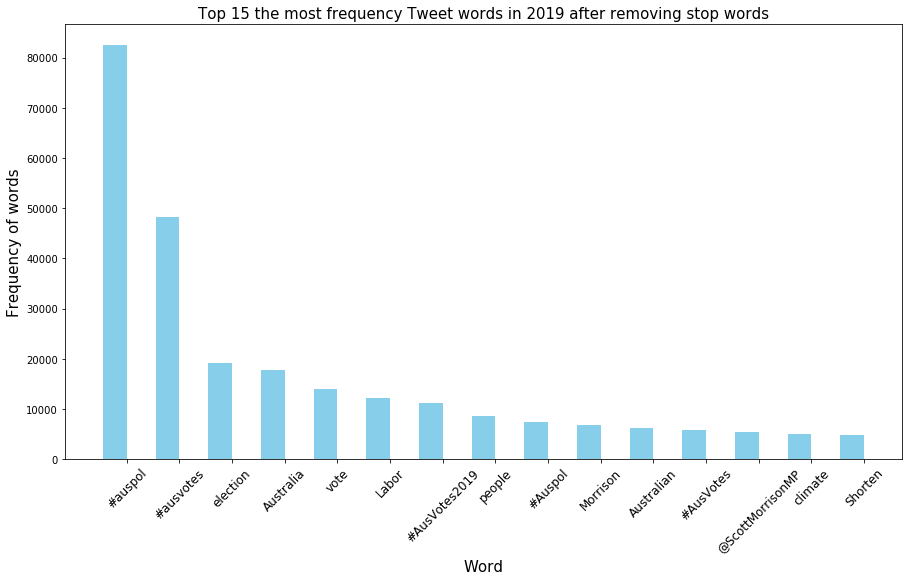

In [35]:
# Find frequency of each mentioned words on twitter 
cnt = Counter()
data_new = aus_elec2019
for x in data_new["full_text"]:
    items = x.split(" ")
    for y in items:
        cnt[y]+=1
ind = np.arange(15) 
width = 0.45       

# Top 15 the most frequency words after removing stop words
# list of stop words
unwanted = ("", "://","-","&amp;", "http", "just","like","The", "This","I", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the");
for k in unwanted:
    del cnt[k]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
first15keys2 = [k for k in sorted(cnt,key = cnt.get,reverse = True)[:15]]
first15vals2 = [k for k in sorted(cnt.values(),reverse = True)[:15]]
rects2 = ax.bar(ind, first15vals2, width,
                color='skyblue')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(first15keys2, fontsize =12, rotation=45)
ax.set_xlabel("Word", fontsize =15)
ax.set_ylabel("Frequency of words", fontsize =15)
ax.set_title("Top 15 the most frequency Tweet words in 2019 after removing stop words", fontsize =15)
plt.show()


Text(0.5, 1.0, 'Twitter - Vocabulary Reviews')

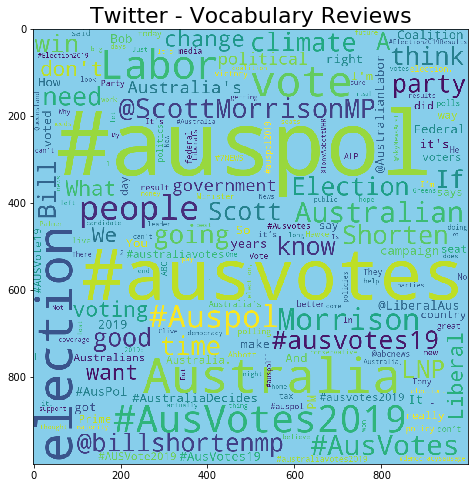

In [36]:
# see the big picture of the frequency mentioned words in twitter
text = cnt
wordcloud = WordCloud(background_color = 'skyblue', width = 1000, height = 1000).generate_from_frequencies(dict(text))
                                                                                                       
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("Twitter - Vocabulary Reviews", fontsize = 22)

**[3.2.1] Analysis Part 1**

Both of visualisations shows similar result as above. Most of mentioned words are about election and political vocabulary. For example, election, vote, labor and Morrisson. 

However, the national conversation may depend on what they want to talk about at that time. The election period might be influenced directly to the citizens' life and wellness therefore, they paid speacial attention to it. 

# 4.Insight

### Answer the questions

**1. What were the top Australian news topics over the last decade.**
- The top the most mentioned words in headline news is "Police".
- The most frequency mentioned state is "New South Wales".
- After considering the sentence that including "Police", it found that top Australian news topics over the last decade is about the police investigation.
- This can reflect that over the past 10 years, the criminal incidents had occured many times and usually been chosen to be a news topic. 
- Government should use this analysis to develop the local community from the criminal problem. For example, analysinging what kind of crime often occur in each cities, is the ability of police officers enough to protect and assist people in public areas and so on.

**2. What can the Australian news topics say about the national conversation.**
- From the analysis, during Australia's election period the issues that had been reported on the news were nearly same as the popular conversation on twitter.
- To summarise, the Australian news topics will be able to reflect the national conversation if the reported news are either the same as the people interests or directly impact to people's well-being.
- For stakeholders who would like to utilise news as a national representation, they should identify their interesting period and analyse the existing data to understand the correlation.
- For example, economists will be especially interested in the socio-economy during COVID-19 outbreak impacted year, they might evaluate the dataset between affected period to analyse the influence of the news to the national behavior regarding consumption, investment and a decrease employment. 
- In term of news creators such as editors and reporters may apply this type of analysis to create the popular news topics or articles which match with national interests.